<div>
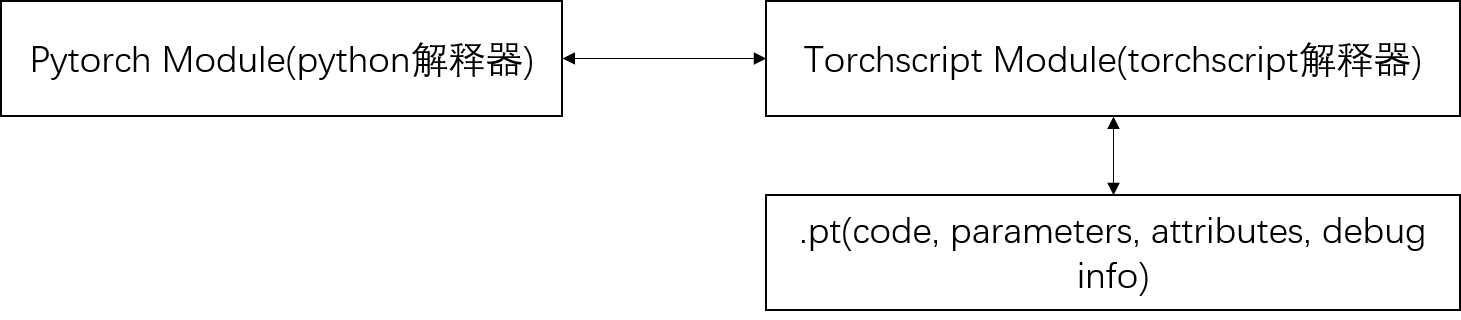
</div>

## 1. 什么是torchscript
torchscript提供了一系列capture模型定义的工具,包括trace和script.torchscript它是一个有着自己解释器的语言.它存在的意义是:
* 是一个restricted的python 解释器, 消除了python(或者更严格的说应该是CPython)中的GIL, 可以达到真正的多线程.
* torchscript module可以被其他语言所写的服务调用
* 可以基于torchscript module便利的进行进一步
* 可以获得更broder的view.

# 2. torchscript工具---trace
当执行torch.trace(module, input)时,事实上进行了如下三步操作:
* a. 调用这一Module
* b. 记录当Module运行时的操作
* c. 生成一个torch.jit.scriptModule的实例

如何通过scriptModule查看Module的定义呢?
* 方式1: .graph, 缺点是复杂、low_level、对end users无用信息太多
* 方式2：.code, 给出一个python语法形式的解释，更加常用

# 3. torchscript工具---script
trace的弊端在于对于if语句等control flow并不能完美的展示出来，因为它要显式的输入一个value、run然后记录操作，因此记录操作时，对于特定的输入value, control flow智能走一条，而使用script是直接对Module进行compiler, 可以完美解决这一缺陷。

## 4. 详略得当---mix script和trace
有时候过于详细的记录、展示torchscript module并不一定是好事。例如当一个Module有许多基于恒定python值的架构决策，我们不希望这些值出现在torchscript中，此时可以通过mix script和trace达到详略得当。